In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("daily_offers.xlsx")

In [3]:
df.shape

(181673, 14)

In [4]:
df.head(5)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [6]:
df.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [7]:
(df.isnull().sum()/len(df))*100

id                0.001101
item_date         0.000550
quantity tons     0.000000
customer          0.000550
country           0.015412
status            0.001101
item type         0.000000
application       0.013211
thickness         0.000550
width             0.000000
material_ref     42.889697
product_ref       0.000000
delivery date     0.000550
selling_price     0.000550
dtype: float64

In [8]:
df.drop(['material_ref','product_ref','quantity tons'],axis=1,inplace=True)

In [9]:
df.columns

Index(['id', 'item_date', 'customer', 'country', 'status', 'item type',
       'application', 'thickness', 'width', 'delivery date', 'selling_price'],
      dtype='object')

In [10]:
df[df['item_date'].isnull()].index

Int64Index([104640], dtype='int64')

In [11]:
df.drop(104640,axis=0,inplace=True)

In [12]:
df['item_date'].isnull().sum()

0

In [13]:
df['item_date'] = df['item_date'].apply(lambda x:str(x).split(".")[0])
df['item_date'] 

0         20210401
1         20210401
2         20210401
3         20210401
4         20210401
            ...   
181668    20200702
181669    20200702
181670    20200702
181671    20200702
181672    20200702
Name: item_date, Length: 181672, dtype: object

In [14]:
df[df['item_date'] == '19950000'].index

Int64Index([52], dtype='int64')

In [15]:
df.drop(52,axis= 0,inplace=True)

In [16]:
df[df['item_date'] == '19950000']

,id,item_date,customer,country,status,item type,application,thickness,width,delivery date,selling_price


In [17]:
df[df['item_date'] == '20191919'].index

Int64Index([105485], dtype='int64')

In [18]:
df.drop(105485,axis= 0,inplace=True)

In [19]:
df['item_date'] = pd.to_datetime(df['item_date'],errors='coerce')
df['item_date']

0        2021-04-01
1        2021-04-01
2        2021-04-01
3        2021-04-01
4        2021-04-01
            ...    
181668   2020-07-02
181669   2020-07-02
181670   2020-07-02
181671   2020-07-02
181672   2020-07-02
Name: item_date, Length: 181670, dtype: datetime64[ns]

In [20]:
df['delivery date'] = df['delivery date'].apply(lambda x:str(x).split(".")[0])
df['delivery date']

0         20210701
1         20210401
2         20210101
3         20210101
4         20210301
            ...   
181668    20200701
181669    20200701
181670    20200701
181671    20200701
181672    20200701
Name: delivery date, Length: 181670, dtype: object

In [21]:
df['delivery date'].unique()

array(['20210701', '20210401', '20210101', '20210301', '20210601',
       '20210501', '20210801', '30310101', '20210901', '20211001',
       '20211101', '20220101', '20200701', '20201001', '20200101',
       '20210201', '20211201', '20190701', '20200801', '20201101',
       '20201201', '20190401', '20200601', '20200401', '20200901',
       '20200501', 'nan', '20212222', '20191001'], dtype=object)

In [22]:
df[df['delivery date'] == 'nan'].index

Int64Index([104761], dtype='int64')

In [23]:
df.drop(104761,axis= 0,inplace=True)

In [24]:
df['delivery date'].unique()

array(['20210701', '20210401', '20210101', '20210301', '20210601',
       '20210501', '20210801', '30310101', '20210901', '20211001',
       '20211101', '20220101', '20200701', '20201001', '20200101',
       '20210201', '20211201', '20190701', '20200801', '20201101',
       '20201201', '20190401', '20200601', '20200401', '20200901',
       '20200501', '20212222', '20191001'], dtype=object)

In [25]:
df[df['delivery date'] == '20212222'].index

Int64Index([105421], dtype='int64')

In [26]:
df.drop(105421,axis= 0,inplace=True)

In [27]:
df['delivery date'] = pd.to_datetime(df['delivery date'],errors='coerce')
df['delivery date']

0        2021-07-01
1        2021-04-01
2        2021-01-01
3        2021-01-01
4        2021-03-01
            ...    
181668   2020-07-01
181669   2020-07-01
181670   2020-07-01
181671   2020-07-01
181672   2020-07-01
Name: delivery date, Length: 181668, dtype: datetime64[ns]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181668 entries, 0 to 181672
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             181666 non-null  object        
 1   item_date      181668 non-null  datetime64[ns]
 2   customer       181667 non-null  float64       
 3   country        181640 non-null  float64       
 4   status         181666 non-null  object        
 5   item type      181668 non-null  object        
 6   application    181644 non-null  float64       
 7   thickness      181667 non-null  float64       
 8   width          181668 non-null  float64       
 9   delivery date  181667 non-null  datetime64[ns]
 10  selling_price  181667 non-null  float64       
dtypes: datetime64[ns](2), float64(6), object(3)
memory usage: 16.6+ MB


In [29]:
df['customer'].isnull().any()

True

In [30]:
df[df['customer'].isnull()]

,id,item_date,customer,country,status,item type,application,thickness,width,delivery date,selling_price
104684,6E764168-3F32-4E5D-BD67-4B1D959C75E3,2020-11-12,NaN,39.0,Won,W,10.0,3.5,1270.0,2021-02-01,650.0


In [31]:
df.drop(104684,axis=0,inplace=True)

In [32]:
df['customer'].isnull().any()

False

In [33]:
df['customer'].value_counts()

30157111.0    4988
30161088.0    3733
30201846.0    3152
30165529.0    2728
30202938.0    2570
              ... 
30271383.0       1
30356502.0       1
30357481.0       1
30156053.0       1
30271291.0       1
Name: customer, Length: 1169, dtype: int64

In [34]:
df['customer'].dtypes

dtype('float64')

In [35]:
df.isnull().sum()

id                2
item_date         0
customer          0
country          28
status            2
item type         0
application      24
thickness         1
width             0
delivery date     1
selling_price     1
dtype: int64

In [36]:
df.dropna(axis=0,inplace=True)

In [37]:
df.isnull().sum()

id               0
item_date        0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
delivery date    0
selling_price    0
dtype: int64

In [38]:
df['country'].value_counts()

78.0     32084
26.0     27514
25.0     23361
27.0     21508
32.0     18658
28.0     15821
84.0     12776
77.0      9713
30.0      8702
39.0      3730
79.0      2742
38.0      1712
40.0      1683
80.0       817
113.0      714
89.0        92
107.0        5
Name: country, dtype: int64

In [39]:
df['status'].value_counts()

Won                116005
Lost                34431
Not lost for AM     19568
Revised              4276
To be approved       4167
Draft                3121
Offered                53
Offerable              10
Wonderful               1
Name: status, dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181632 entries, 0 to 181672
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             181632 non-null  object        
 1   item_date      181632 non-null  datetime64[ns]
 2   customer       181632 non-null  float64       
 3   country        181632 non-null  float64       
 4   status         181632 non-null  object        
 5   item type      181632 non-null  object        
 6   application    181632 non-null  float64       
 7   thickness      181632 non-null  float64       
 8   width          181632 non-null  float64       
 9   delivery date  181632 non-null  datetime64[ns]
 10  selling_price  181632 non-null  float64       
dtypes: datetime64[ns](2), float64(6), object(3)
memory usage: 16.6+ MB


In [41]:
df['item type'].value_counts()

W         105608
S          69202
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: item type, dtype: int64

In [42]:
df['application'].unique()

array([10., 41., 28., 59., 15.,  4., 38., 56., 42., 26., 27., 19., 20.,
       66., 29., 22., 40., 25., 67., 79.,  3., 99.,  2.,  5., 39., 69.,
       70., 65., 58., 68.])

In [43]:
df['thickness'].value_counts()

2.00     13468
3.00     13206
0.50     12247
1.50     11731
1.00      9473
         ...  
7.06         1
9.39         1
15.66        1
2.28         1
15.60        1
Name: thickness, Length: 594, dtype: int64

In [44]:
df.drop(['id'],axis=1,inplace=True)

In [45]:
df.head()

,item_date,customer,country,status,item type,application,thickness,width,delivery date,selling_price
0,2021-04-01,30156308.0,28.0,Won,W,10.0,2.00,1500.0,2021-07-01,854.00
1,2021-04-01,30202938.0,25.0,Won,W,41.0,0.80,1210.0,2021-04-01,1047.00
2,2021-04-01,30153963.0,30.0,Won,WI,28.0,0.38,952.0,2021-01-01,644.33
3,2021-04-01,30349574.0,32.0,Won,S,59.0,2.30,1317.0,2021-01-01,768.00
4,2021-04-01,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2021-03-01,577.00


In [46]:
object_columns = [i for i in df.columns if df[i].dtypes == 'object']
numerical_columns = [i for i in df.columns if df[i].dtypes in ('int','float')]

In [47]:
object_columns

['status', 'item type']

In [48]:
numerical_columns

['customer', 'country', 'application', 'thickness', 'width', 'selling_price']

In [49]:
df['no_of_days_toprocess'] = (df['delivery date'] - df['item_date']).dt.days

In [50]:
df['no_of_days_toprocess']

0         91
1          0
2        -90
3        -90
4        -31
          ..
181668    -1
181669    -1
181670    -1
181671    -1
181672    -1
Name: no_of_days_toprocess, Length: 181632, dtype: int64

In [51]:
df.duplicated().any()

True

In [52]:
a = df.groupby('item type',as_index=False).size().rename(columns={'size':'Count'}).sort_values('Count',ascending=False)

In [53]:
a.head()

,item type,Count
5,W,105608
3,S,69202
2,PL,5660
1,Others,610
6,WI,524


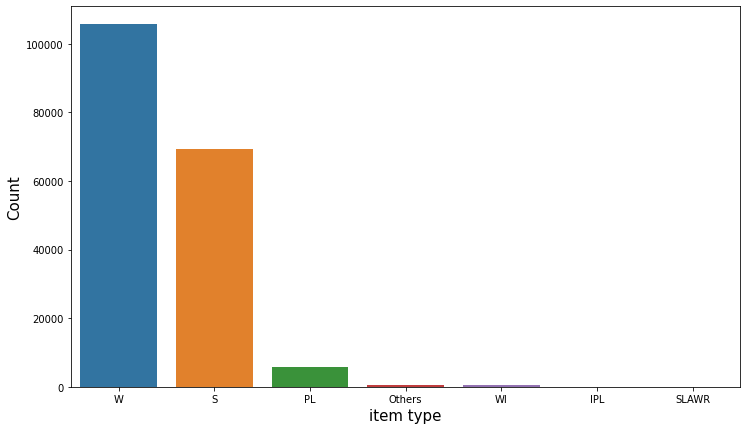

In [54]:
plt.figure(figsize=(12,7))
sns.barplot(x='item type',y = 'Count',data=a)
plt.xlabel(xlabel='item type', size=15)
plt.ylabel(ylabel='Count', size=15)
plt.show()

In [55]:
b = df.groupby('status',as_index=False).size().rename(columns={'size':'Count'}).sort_values('Count',ascending=False)

In [56]:
b.head()

,status,Count
7,Won,116005
1,Lost,34431
2,Not lost for AM,19568
5,Revised,4276
6,To be approved,4167


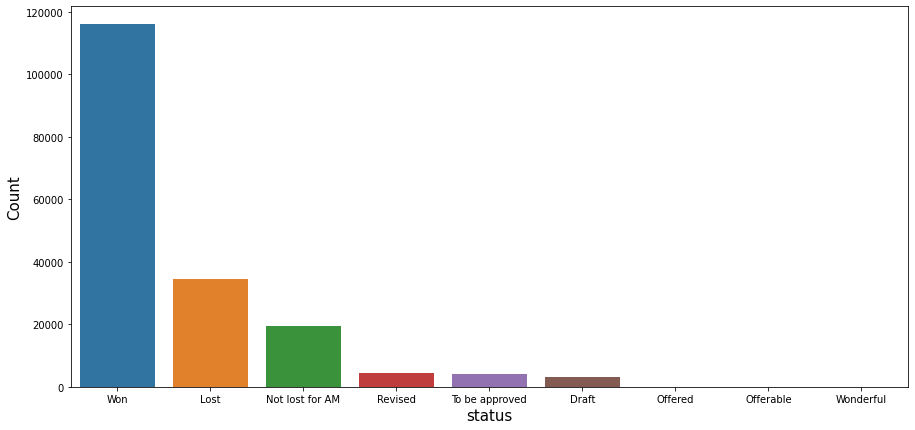

In [57]:
plt.figure(figsize=(15,7))
sns.barplot(x='status',y = 'Count',data=b)
plt.xlabel(xlabel='status', size=15)
plt.ylabel(ylabel='Count', size=15)
plt.show()

In [58]:
df.corr()

,customer,country,application,thickness,width,selling_price,no_of_days_toprocess
customer,1.000000,0.083573,0.000878,0.038763,0.050535,0.001747,0.018759
country,0.083573,1.000000,-0.019333,-0.019582,0.055280,0.002993,-0.199316
application,0.000878,-0.019333,1.000000,-0.059481,-0.204458,0.001462,-0.166503
thickness,0.038763,-0.019582,-0.059481,1.000000,0.161644,-0.001129,0.032911
width,0.050535,0.055280,-0.204458,0.161644,1.000000,0.000584,0.054090
selling_price,0.001747,0.002993,0.001462,-0.001129,0.000584,1.000000,-0.004252
no_of_days_toprocess,0.018759,-0.199316,-0.166503,0.032911,0.054090,-0.004252,1.000000


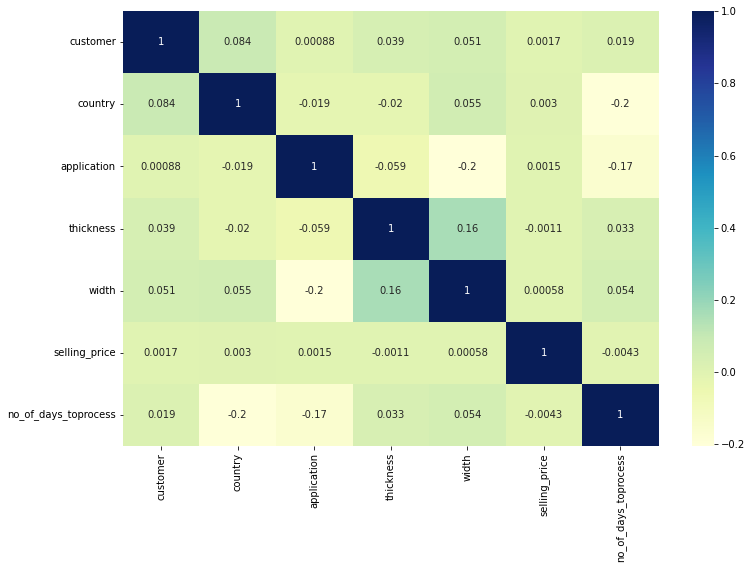

In [59]:
#Using Pearson Correlation
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


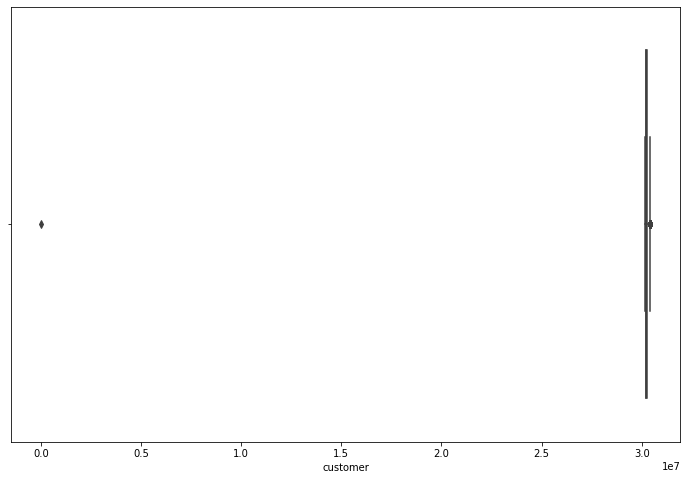

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


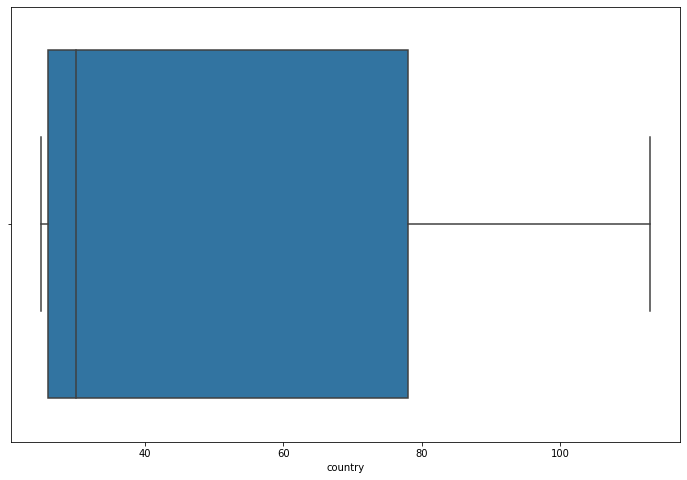

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


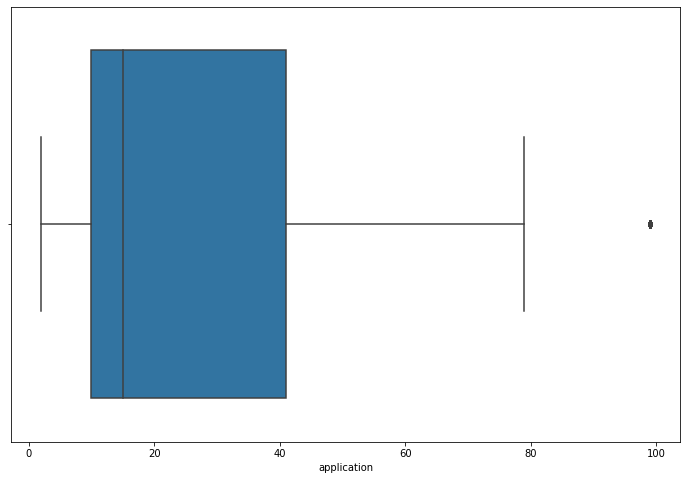

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


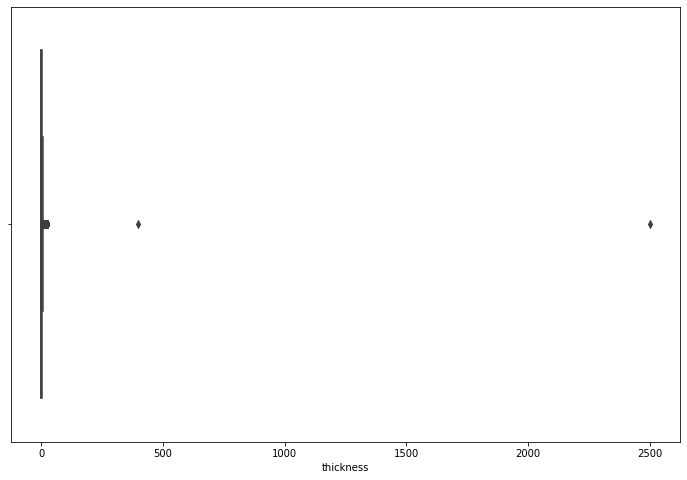

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


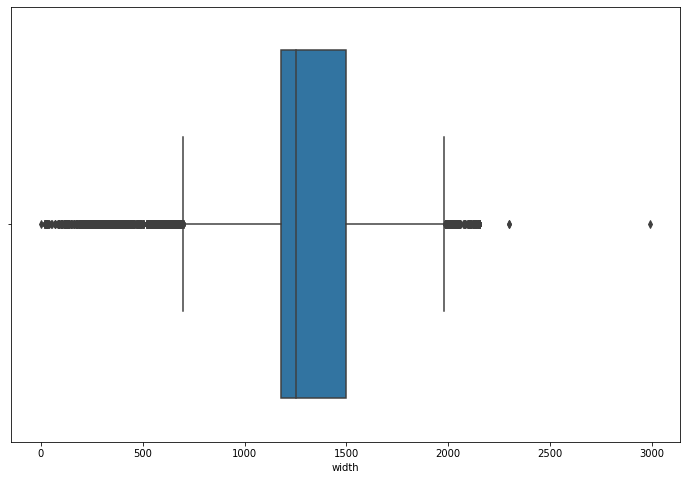

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


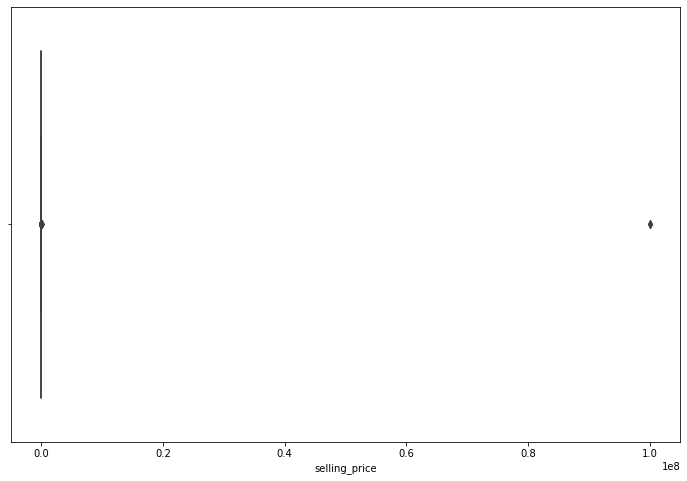

In [60]:
for i in numerical_columns:
    plt.figure(figsize=(12,8))
    sns.boxplot(df[i])
    plt.show()

In [61]:
df.columns

Index(['item_date', 'customer', 'country', 'status', 'item type',
       'application', 'thickness', 'width', 'delivery date', 'selling_price',
       'no_of_days_toprocess'],
      dtype='object')

In [62]:
df1 = df.copy()

In [63]:
df1.drop(['item_date','delivery date'],axis=1,inplace=True)

In [64]:
df2 = df1.copy()

In [65]:
df3 = pd.get_dummies(df2,drop_first=True)

In [66]:
df4 = df3.copy()

In [67]:
df3.head()

,customer,country,application,thickness,width,selling_price,no_of_days_toprocess,status_Lost,status_Not lost for AM,status_Offerable,...,status_Revised,status_To be approved,status_Won,status_Wonderful,item type_Others,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI
0,30156308.0,28.0,10.0,2.00,1500.0,854.00,91,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,30202938.0,25.0,41.0,0.80,1210.0,1047.00,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,30153963.0,30.0,28.0,0.38,952.0,644.33,-90,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,30349574.0,32.0,59.0,2.30,1317.0,768.00,-90,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,30211560.0,28.0,10.0,4.00,2000.0,577.00,-31,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
from sklearn.preprocessing import MinMaxScaler
X = df3.drop('selling_price',axis=1)
y = df3['selling_price']

features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features
X.head()

,customer,country,application,thickness,width,no_of_days_toprocess,status_Lost,status_Not lost for AM,status_Offerable,status_Offered,status_Revised,status_To be approved,status_Won,status_Wonderful,item type_Others,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI
0,0.991713,0.034091,0.082474,0.000728,0.501506,0.686016,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.993248,0.000000,0.402062,0.000248,0.404483,0.605981,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.991636,0.056818,0.268041,0.000080,0.318167,0.526825,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.998072,0.079545,0.587629,0.000848,0.440281,0.526825,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.993531,0.034091,0.082474,0.001528,0.668786,0.578716,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10,random_state=42)
X_train.shape, X_test.shape

((163468, 20), (18164, 20))

In [71]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor 

## Linear Regression

In [72]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [73]:
train_predictions = lm.predict(X_train)
print("Predicted train value :", train_predictions)

Predicted train value : [-1406.67829335  -947.81220079 -1217.73527298 ...   556.80713621
  6291.5262533   3155.93421125]


In [74]:
test_predictions = lm.predict(X_test)
print("Predicted test value :", test_predictions)

Predicted test value : [-4158.1650888   8966.25435163 -2045.489045   ...  5278.0535573
 -2795.30160358  1328.36672716]


In [75]:
lm.score(X_test,y_test)

-764.2225992917182

In [76]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [77]:
print('r2score_train:', r2_score(y_train, train_predictions))
print('r2score_test:', r2_score(y_test, test_predictions))
print('MAE:', mean_absolute_error(y_test, test_predictions))
print('MSE:', mean_squared_error(y_test, test_predictions))
print('RMSE train ',np.sqrt(mean_squared_error(y_train,train_predictions)))
print('RMSE test',np.sqrt(mean_squared_error(y_test,test_predictions)))

r2score_train: 0.0003005836631759795
r2score_test: -764.2225992917182
MAE: 3559.092117638933
MSE: 38737667.50667344
RMSE train  349728.9218011446
RMSE test 6223.95915046632


## Ridge

In [78]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)

Ridge(alpha=0.01)

In [79]:
train_predictions = rr.predict(X_train)
print("Predicted train value:", train_predictions)

Predicted train value: [-1404.82701504  -946.39089108 -1217.56043717 ...   558.53358949
  6293.63469687  3156.49558582]


In [80]:
test_predictions = rr.predict(X_test)
print("Predicted test value:", test_predictions)

Predicted test value: [-4157.67491433  8967.82478024 -2044.64538558 ...  5276.31401351
 -2795.67955798  1327.33959097]


In [81]:
rr.score(X_test,y_test)

-764.1898644455733

In [82]:
print('r2score_train:', r2_score(y_train, train_predictions))
print('r2score_test:', r2_score(y_test, test_predictions))
print('MAE:', mean_absolute_error(y_test, test_predictions))
print('MSE:', mean_squared_error(y_test, test_predictions))
print('RMSE train ',np.sqrt(mean_squared_error(y_train,train_predictions)))
print('RMSE test',np.sqrt(mean_squared_error(y_test,test_predictions)))

r2score_train: 0.0003005835196843165
r2score_test: -764.1898644455733
MAE: 3558.8615175669624
MSE: 38736010.378947444
RMSE train  349728.9218262437
RMSE test 6223.826024154872


## Lasso

In [83]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.896e+15, tolerance: 2.000e+12
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

In [84]:
train_predictions = model_lasso.predict(X_train)
print("Predicted train value :", train_predictions)

Predicted train value : [-1403.9795418   -946.53792507 -1217.50319889 ...   558.38940961
  6292.36650294  3156.61039569]


In [85]:
test_predictions = model_lasso.predict(X_test)
print("Predicted test value:", test_predictions)

Predicted test value: [-4157.43927337  8966.80766407 -2044.54405656 ...  5276.50125278
 -2793.50917474  1328.21249923]


In [86]:
print('r2score_train:', r2_score(y_train, train_predictions))
print('r2score_test:', r2_score(y_test, test_predictions))
print('MAE:', mean_absolute_error(y_test, test_predictions))
print('MSE:', mean_squared_error(y_test, test_predictions))
print('RMSE train ',np.sqrt(mean_squared_error(y_train,train_predictions)))
print('RMSE test',np.sqrt(mean_squared_error(y_test,test_predictions)))

r2score_train: 0.0003005826743321949
r2score_test: -764.1550964748375
MAE: 3558.7478397379427
MSE: 38734250.3288764
RMSE train  349728.9219741102
RMSE test 6223.684626399091


## Decision Tree

In [87]:
dtr= DecisionTreeRegressor(random_state = 0) 
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [88]:
train_predictions = dtr.predict(X_train)
print("Predicted train value:", train_predictions)

Predicted train value: [655.         754.4        788.         ... 645.8        874.
 632.33333333]


In [89]:
test_predictions = dtr.predict(X_test)
print("Predicted test value:", test_predictions)

Predicted test value: [1225.          795.69230769 1004.         ...  720.4         701.
  522.        ]


In [90]:
print('r2score_train:', r2_score(y_train, train_predictions))
print('r2score_test:', r2_score(y_test, test_predictions))
print('MAE:', mean_absolute_error(y_test, test_predictions))
print('MSE:', mean_squared_error(y_test, test_predictions))
print('RMSE train ',np.sqrt(mean_squared_error(y_train,train_predictions)))
print('RMSE test',np.sqrt(mean_squared_error(y_test,test_predictions)))

r2score_train: 0.999999734429538
r2score_test: 0.8128475070709118
MAE: 46.244021071295776
MSE: 9474.172679743715
RMSE train  180.254748475459
RMSE test 97.33536191818324


## knn regressor

In [91]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [92]:
train_predictions = knn.predict(X_train)
print("Predicted train value :", train_predictions)

Predicted train value : [730.2  803.16 805.6  ... 639.   783.4  644.4 ]


In [93]:
test_predictions = knn.predict(X_test)
print("Predicted test value:", test_predictions)

Predicted test value: [1228.4  803.6 1044.2 ...  720.4  693.4  514.8]


In [94]:
print('r2score_train:', r2_score(y_train, train_predictions))
print('r2score_test:', r2_score(y_test, test_predictions))
print('MAE:', mean_absolute_error(y_test, test_predictions))
print('MSE:', mean_squared_error(y_test, test_predictions))
print('RMSE train ',np.sqrt(mean_squared_error(y_train,train_predictions)))
print('RMSE test',np.sqrt(mean_squared_error(y_test,test_predictions)))

r2score_train: 0.2799959368383582
r2score_test: -870021.391780366
MAE: 2264.9436841004185
MSE: 44042920540.17143
RMSE train  296800.27796320943
RMSE test 209864.05252012893


## Random Forest Regressor

In [95]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [96]:
train_predictions = rf_model.predict(X_train)
print("Predicted train value :", train_predictions)

Predicted train value : [662.1985     756.11233333 814.84       ... 642.8        852.9022
 632.63122619]


In [97]:
test_predictions = rf_model.predict(X_test)
print("Predicted test value:", test_predictions)

Predicted test value: [1257.07804762  794.78204004 1002.865      ...  719.31913023  689.69333333
  518.91166667]


In [98]:
print('r2score_train:', r2_score(y_train, train_predictions))
print('r2score_test:', r2_score(y_test, test_predictions))
print('MAE:', mean_absolute_error(y_test, test_predictions))
print('MSE:', mean_squared_error(y_test, test_predictions))
print('RMSE train ',np.sqrt(mean_squared_error(y_train,train_predictions)))
print('RMSE test',np.sqrt(mean_squared_error(y_test,test_predictions)))

r2score_train: 0.8213966448970843
r2score_test: -3261.5716684055806
MAE: 207.171688942761
MSE: 165160329.32687593
RMSE train  147822.87213368734
RMSE test 12851.471873947978


## ada boost regressor

In [99]:
ada_reg = AdaBoostRegressor()
ada_reg.fit(X_train, y_train)

AdaBoostRegressor()

In [100]:
train_predictions = ada_reg.predict(X_train)
print("Predicted train value :", train_predictions)

Predicted train value : [787.46381522 772.5840728  848.99987281 ... 768.68576111 902.23485216
 791.91291366]


In [101]:
test_predictions = ada_reg.predict(X_test)
print("Predicted test value:", test_predictions)

Predicted test value: [973.67393523 787.46381522 886.6648987  ... 772.5840728  856.88802307
 772.5840728 ]


In [102]:
print('r2score_train:', r2_score(y_train, train_predictions))
print('r2score_test:', r2_score(y_test, test_predictions))
print('MAE:', mean_absolute_error(y_test, test_predictions))
print('MSE:', mean_squared_error(y_test, test_predictions))
print('RMSE train ',np.sqrt(mean_squared_error(y_train,train_predictions)))
print('RMSE test',np.sqrt(mean_squared_error(y_test,test_predictions)))

r2score_train: 0.98445075216812
r2score_test: 0.21290252219463868
MAE: 146.8849285498435
MSE: 39845.03387483181
RMSE train  43616.57128318012
RMSE test 199.6122087319105


## gradient boost regressor

In [103]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [104]:
train_predictions = gbr.predict(X_train)
print("Predicted train value :", train_predictions)

Predicted train value : [828.8075635  348.87774803 813.44068958 ... 587.73460919 313.85154546
 701.46120222]


In [105]:
test_predictions = gbr.predict(X_test)
print("Predicted test value:", test_predictions)

Predicted test value: [-2249.66531492 -2054.53756962   811.85653631 ...   178.30397255
  1134.18197356   457.14865189]


In [106]:
print('r2score_train:', r2_score(y_train, train_predictions))
print('r2score_test:', r2_score(y_test, test_predictions))
print('MAE:', mean_absolute_error(y_test, test_predictions))
print('MSE:', mean_squared_error(y_test, test_predictions))
print('RMSE train ',np.sqrt(mean_squared_error(y_train,train_predictions)))
print('RMSE test',np.sqrt(mean_squared_error(y_test,test_predictions)))

r2score_train: 0.5634060043403826
r2score_test: -324896.28762269043
MAE: 3980.9309064883396
MSE: 16447192115.597572
RMSE train  231119.0315614638
RMSE test 128246.60664359729


## xg boost

In [107]:
xg_reg = XGBRegressor()
xg_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [108]:
train_predictions = xg_reg.predict(X_train)
print("Predicted train value :", train_predictions)

Predicted train value : [672.35834 780.906   916.41656 ... 683.19214 866.3077  654.03613]


In [109]:
test_predictions = xg_reg.predict(X_test)
print("Predicted test value:", test_predictions)

Predicted test value: [1171.5476   866.67236  937.9476  ...  653.99255  813.0762   540.29047]


In [110]:
print('r2score_train:', r2_score(y_train, train_predictions))
print('r2score_test:', r2_score(y_test, test_predictions))
print('MAE:', mean_absolute_error(y_test, test_predictions))
print('MSE:', mean_squared_error(y_test, test_predictions))
print('RMSE train ',np.sqrt(mean_squared_error(y_train,train_predictions)))
print('RMSE test',np.sqrt(mean_squared_error(y_test,test_predictions)))

r2score_train: 0.9999996195524473
r2score_test: 0.7537157897194858
MAE: 81.12523352786533
MSE: 12467.582450937496
RMSE train  215.7467325393018
RMSE test 111.65832907104377
